### Data Cleaning
#### Objectives

Data cleaning techniques

*   Use Log function to transform the data
*   Handle the duplicates
*   Handle the missing values
*   Standardize and normalize the data
*   Handle the outliers

The following libraries will be used
 - [`pandas`](https://pandas.pydata.org/) for managing the data.
 - [`numpy`](https://numpy.org/) for mathematical operations.
 - [`seaborn`](https://seaborn.pydata.org/) for visualizing the data.
 - [`matplotlib`](https://matplotlib.org/) for visualizing the data.
 - [`sklearn`](https://scikit-learn.org/stable/) for machine learning and machine-learning-pipeline related functions.
 - [`scipy`](https://docs.scipy.org/doc/scipy/tutorial/stats.html/) for statistical computations.


In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from scipy.stats import norm
from scipy import stats

In [3]:
# Read the dataset
df = pd.read_csv("data/Ames_Housing_Data1.tsv", sep='\t')
df.head(5)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
2,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
3,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
4,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2931 entries, 0 to 2930
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2931 non-null   int64  
 1   PID              2931 non-null   int64  
 2   MS SubClass      2931 non-null   int64  
 3   MS Zoning        2931 non-null   object 
 4   Lot Frontage     2441 non-null   float64
 5   Lot Area         2931 non-null   int64  
 6   Street           2931 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2931 non-null   object 
 9   Land Contour     2931 non-null   object 
 10  Utilities        2931 non-null   object 
 11  Lot Config       2931 non-null   object 
 12  Land Slope       2931 non-null   object 
 13  Neighborhood     2931 non-null   object 
 14  Condition 1      2931 non-null   object 
 15  Condition 2      2931 non-null   object 
 16  Bldg Type        2931 non-null   object 
 17  House Style   

In [4]:
# show the count, mean, min, max of the sale price attribute.
df['SalePrice'].describe()

count      2931.000000
mean     180807.729785
std       79875.557267
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64

- it is important to note that the minimum value is greater than 0. Also, there is a big difference between the minimum value and the 25th percentile. It is bigger than the 75th percentile and the maximum value. This means that our data might not be normally distributed (an important assumption for linear regression analysis), so will check for normality in the Log Transform section.

- The describe() function reveals the statistical information about the numeric attributes. To reveal some information about our categorical (object) attributes, we can use value_counts() function. 

In [5]:
df['Sale Condition'].value_counts()

Sale Condition
Normal     2414
Partial     245
Abnorml     190
Family       46
Alloca       24
AdjLand      12
Name: count, dtype: int64

### 1. Coorelation Analysis
- Before proceeding with the data cleaning, it is useful to establish a correlation between the response variable (in our case the sale price) and other predictor variables, as some of them might not have any major impact in determining the price of the house and will not be used in the analysis.
#### Methods for Correlation Analysis:
1. Pair Plots
2. Scatter Plots
3. Heat Maps
5. Correlation Matrixes

##### 1. Pair Plots (Seaborn's pairplot)
- Use link => https://seaborn.pydata.org/generated/seaborn.pairplot.html
##### Purpose:
- Visualizes pairwise relationships between multiple variables.
- Useful for detecting linear and non-linear correlations.

##### How it works:
- Plots every numerical feature against every other feature.
- Uses scatter plots for continues variables.
- Can include histograms or KDE (Kernal Density Estimation) for univariate distributions.

##### When to Use:
- Ideal for small to medium datasets.
- Helps visually explore relationships before statistical analysis.

In [ ]:
# sns.pairplot(df, hue='Sale Condition')

##### 2. Scatter Plots
##### Purpose:
- A simple way to visualize the relationship between two continuous variables.
- Helps detect linear, non-linear, or no correlation.
##### How it Works:

- Each point represents an observation.
- The pattern of points determines the correlation type:
- Upward trend → Positive correlation
- Downward trend → Negative correlation
- No clear trend → No correlation

##### When to Use:

- To visually confirm relationships before applying statistical measures.
- Works well when analyzing two variables at a time.

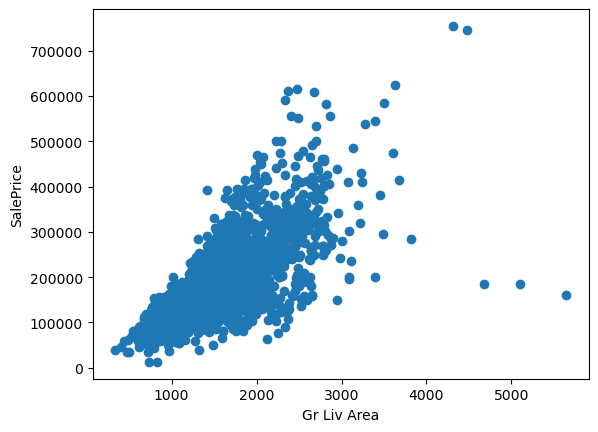

In [4]:
# Scatter plot using matplotlib
plt.scatter(df['Gr Liv Area'], df['SalePrice'])
plt.xlabel('Gr Liv Area')
plt.ylabel('SalePrice')
plt.show()

<Axes: xlabel='Gr Liv Area', ylabel='SalePrice'>

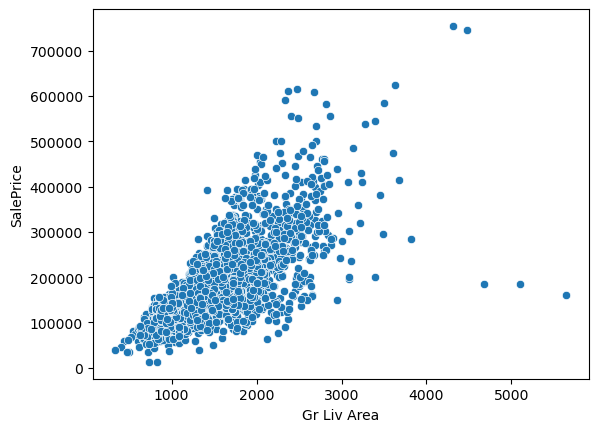

In [5]:
# Scatter plot using seaborn
sns.scatterplot(x='Gr Liv Area', y='SalePrice', data=df)

#### Key Observations from the Scatter Plot:
1. Positive Correlation:
- The plot shows an upward trend, meaning that as the Gr Liv Area (square footage) increases, the Sale Price also tends to increase.
- This suggests a strong positive correlation between house size and sale price.

2. Cluster of Data Points (Dense Region):

- Most houses have a Gr Liv Area between 1,000 and 3,000 sq ft.
- Sale prices for these houses range from $50,000 to around $400,000.

3. Outliers:

- Some houses have very high sale prices ($600,000+), which could indicate luxury homes or special features.
- A few homes with a Gr Liv Area above 4,000 sq ft are priced lower than expected, possibly due to location, condition, or other factors.

4. How This Helps in Correlation Analysis:
- A strong correlation suggests that "Gr Liv Area" is a key predictor of house prices.
- Outliers should be investigated further—they might indicate anomalies in the dataset (e.g., data entry errors, unusual market conditions, or misclassified properties).
- Further statistical correlation analysis (such as Pearson’s correlation coefficient) could quantify the exact strength of the relationship.

##### 3. Heat Maps
##### Purpose:
- Displays the correlation matrix as a color-coded grid.
- Helps identify highly correlated variables at a glance.

##### How it Works:
- Colors represent the strength and direction of correlation.
- Dark colors indicate strong correlations (positive or negative).
- Light colors indicate weak or no correlation.

##### When to Use:
- For large datasets with multiple numerical features.
- To detect highly correlated pairs that might cause multicollinearity.

##### When to Use:
- For large datasets with multiple numerical features.
- To detect highly correlated pairs that might cause multicollinearity.

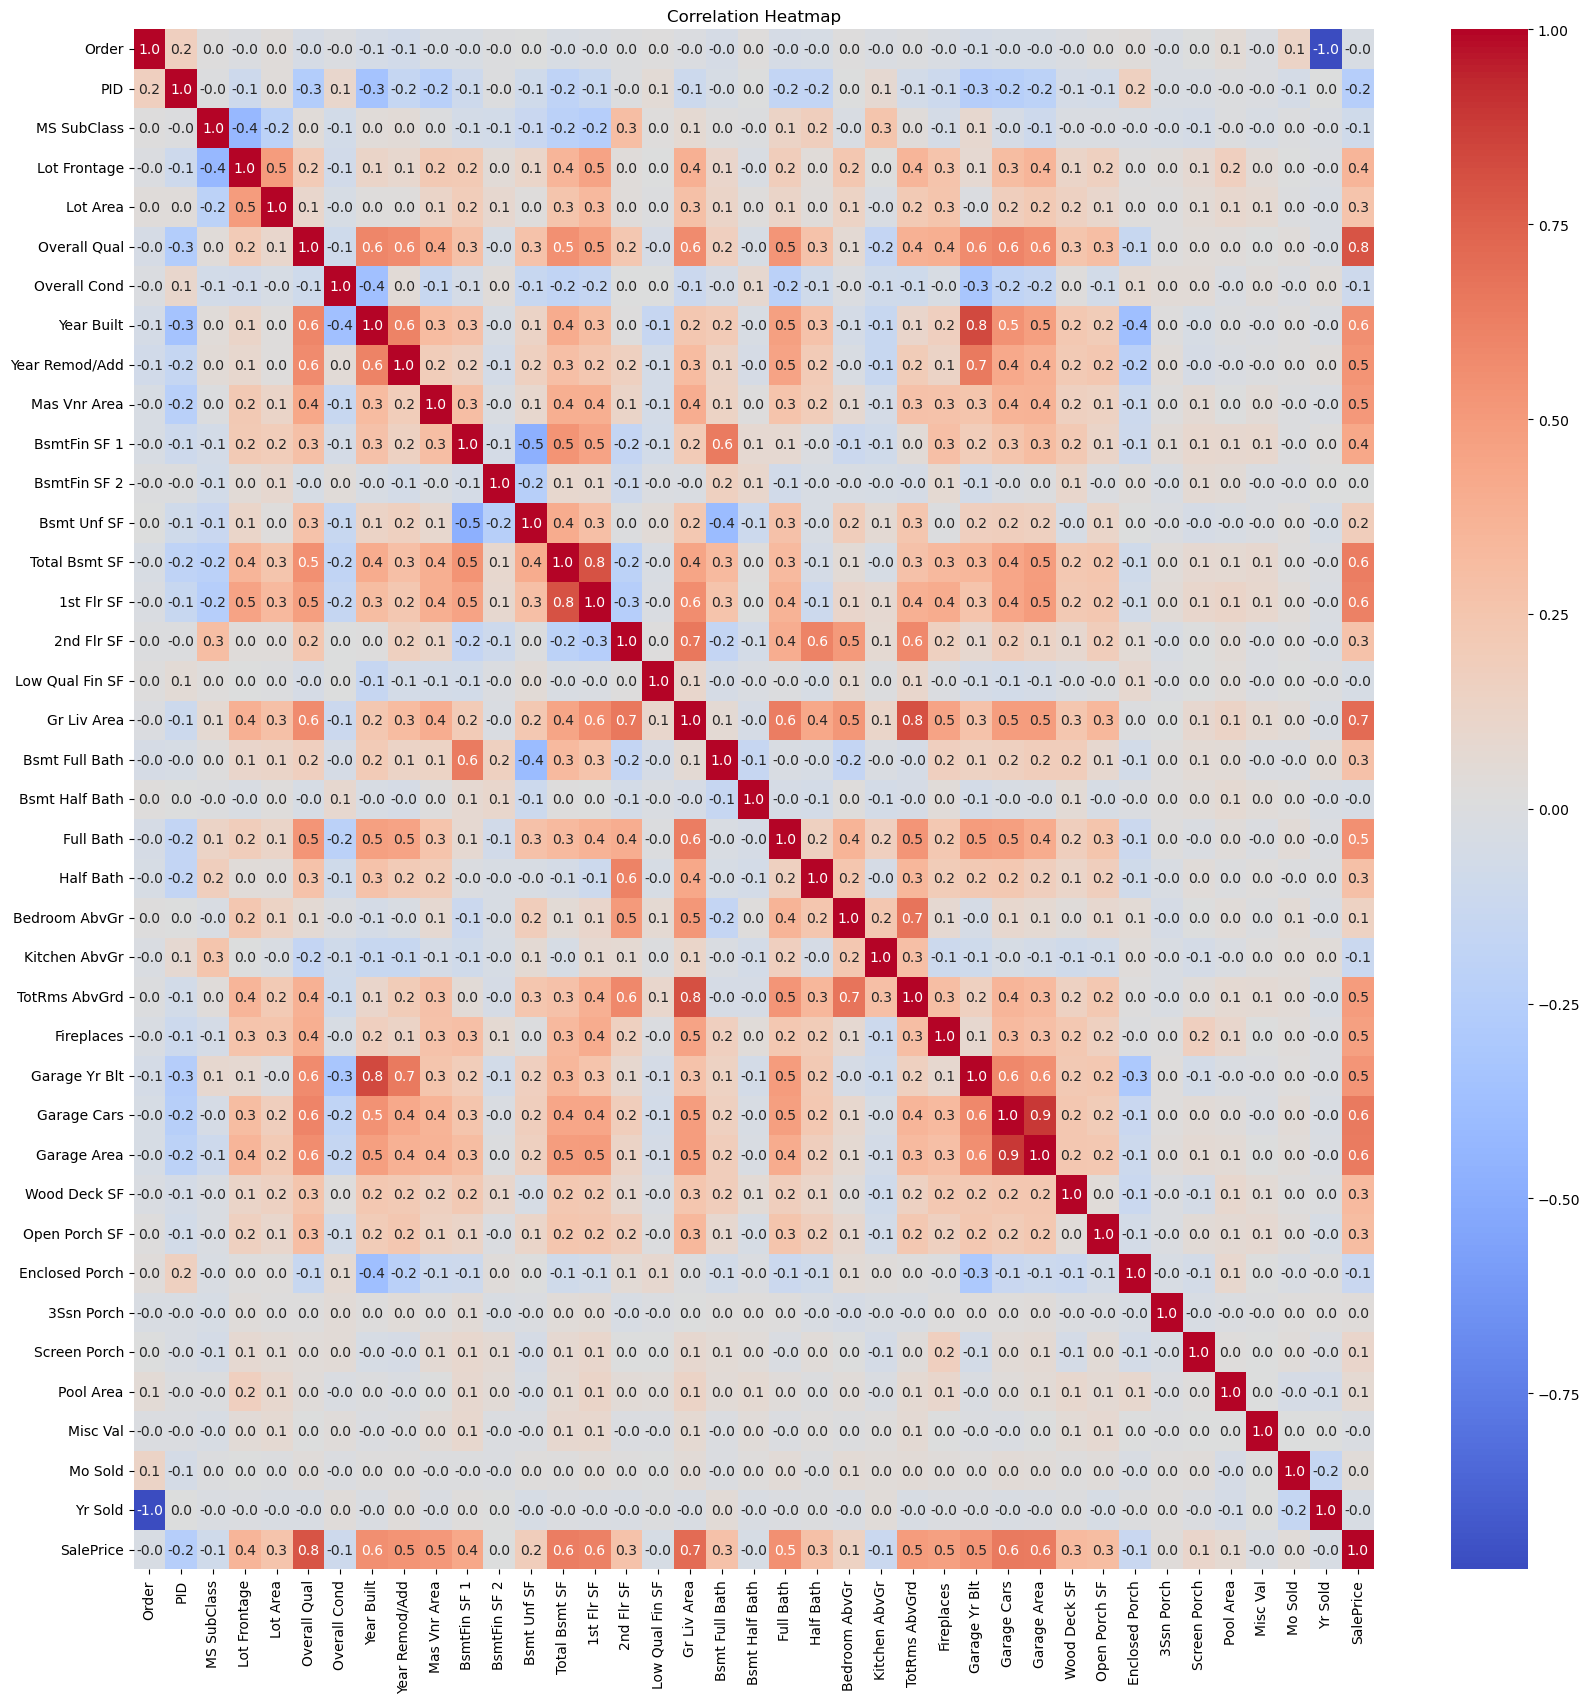

In [17]:
### Compute the correlation matrix
corr_matrix = df.corr(numeric_only=True)

# create heatmap
plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".1f")
plt.title("Correlation Heatmap")
plt.show()

#### 4. Correlation Matrix
#### Purpose:
- Provides a numerical summary of correlations between multiple variables.
- Shows values ranging from -1 to 1:
    - +1: Perfect positive correlation
    - -1: Perfect negative correlation
    - 0: No correlation

#### How it Works:
- Computes Pearson’s correlation coefficient by default. Computes Pearson measures how closely two sequences of numbers are correlated. Correlation coefficient can only be calculated on the numerical attributes (floats and integers)
- Can also compute Spearman’s or Kendall’s correlation.

#### When to Use:
- To get exact correlation values between numerical features.
- Before feature selection or multicollinearity checks.

In [24]:
hous_num = df.select_dtypes(include = ['float64', 'int64'])

hous_num_corr = hous_num.corr()['SalePrice'][:-1] # -1 means that the latest row is SalePrice and exclude it from the analysis

top_features = hous_num_corr[abs(hous_num_corr) > 0.5].sort_values(ascending=False)

print("There is {} strongly correlated values with SalePrice:\n{}".format(len(top_features), top_features))

There is 11 strongly correlated values with SalePrice:
Overall Qual      0.799226
Gr Liv Area       0.706791
Garage Cars       0.647891
Garage Area       0.640411
Total Bsmt SF     0.632270
1st Flr SF        0.621672
Year Built        0.558340
Full Bath         0.545339
Year Remod/Add    0.532664
Garage Yr Blt     0.526808
Mas Vnr Area      0.508277
Name: SalePrice, dtype: float64


### 3. Log Transformation
- To see if our SalePrice data is normally distributed or not. we will use distribution plot
- Use distplot() function from the seaborn library.

c:\Users\mirfa\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


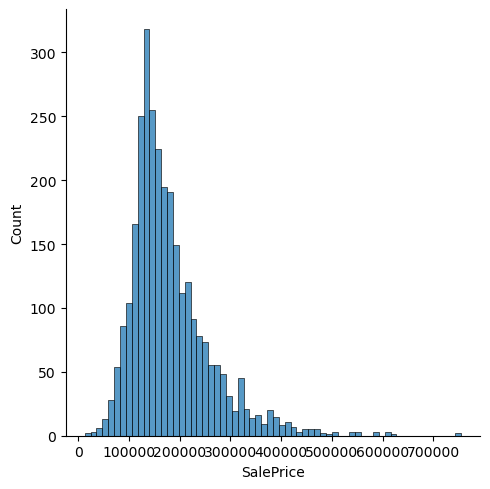

In [30]:
sp_untransformed = sns.displot(df['SalePrice'])

As the plot shows, our 'SalePrice' deviates from the normal distribution. It has a longer tail to the right, so we call it a positive skew. In statistics skewness is a measure of asymmetry of the distribution. In addition to skewness, there is also a kurtosis, parameter which refers to the pointedness of a peak in the distribution curve. Both skewness and kurtosis are frequently used together to characterize the distribution of data.

In [31]:
# skew() function to calculate our skewness level of the SalePrice
print("Skewness of SalePrice: {:.2f}".format(df['SalePrice'].skew()))

Skewness of SalePrice: 1.74


The range of skewness for a fairly symmetrical bell curve distribution is between -0.5 and 0.5; moderate skewness is -0.5 to -1.0 and 0.5 to 1.0; and highly skewed distribution is < -1.0 and > 1.0. In our case, we have ~1.7, so it is considered  highly skewed data. 

Now, we can try to transform our data, so it looks more normally distributed. We can use the `np.log()` function from the `numpy` library to perform log transform. This [documentation](https://numpy.org/doc/stable/reference/generated/numpy.log.html) contains more information about the numpy log transform.

In [32]:
log_transformed = np.log1p(df['SalePrice'])

c:\Users\mirfa\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


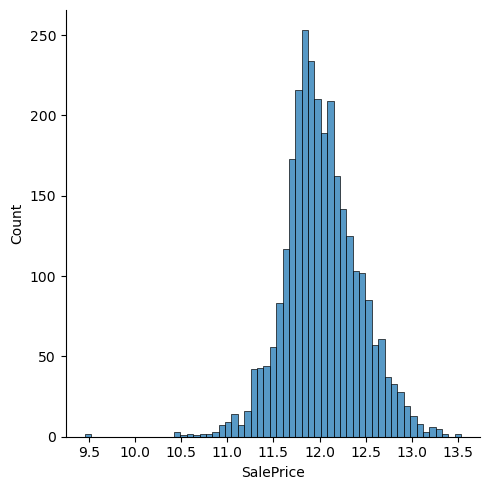

In [33]:
sp_transformed = sns.displot(log_transformed)

In [34]:
print("Skewness: %f" % (log_transformed).skew())

Skewness: -0.015333


As we can see, the log method transformed the 'SalePrice' distribution into a more symmetrical bell curve and the skewness level now is -0.01, well within the range. 

There are other ways to correct for skewness of the data. For example, Square Root Transform (`np.sqrt`) and the Box-Cox Transform (`stats.boxcox` from the `scipy stats` library). To learn more about these two methods, please check out this [article](https://towardsdatascience.com/top-3-methods-for-handling-skewed-data-1334e0debf45).
